### 회귀 Regression
### 202045062  김수민



In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
M = [[0],[1],[2],[3],[4]]
B = [[0],[10],[20],[30],[40]]
reg.fit(M,B)
print(f'기울기 M : {reg.coef_}')
print(f'y절편 B : {reg.intercept_}')

print(f'5시간 예측 : {reg.predict([[5]])}')

기울기 M : [[10.]]
y절편 B : [-3.55271368e-15]
5시간 예측 : [[50.]]


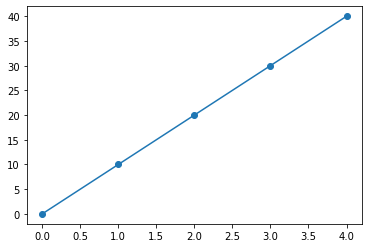

In [19]:
import matplotlib.pyplot as plt
plt.scatter(M,B) # k는 검은색점
# plt.plot(M,B, '.k') # k는 검은색점
plt.plot(M, reg.predict(M))
plt.show()

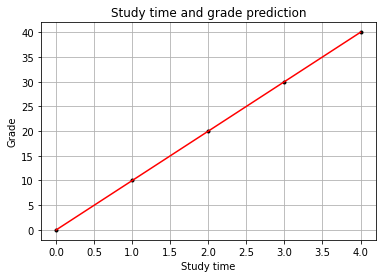

In [20]:
import matplotlib.pyplot as plt
# plt.scatter(M,B) # k는 검은색점
plt.plot(M,B, '.k') # k는 검은색점
plt.plot(M, reg.predict(M), color="red")
plt.title('Study time and grade prediction')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.grid(True) #  그리드 설정
plt.show()

[[5.01298628]] [4.64844793]


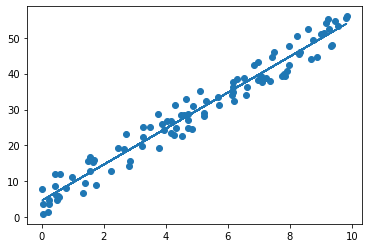

In [21]:
import numpy as np
x = 10*np.random.rand(100, 1)
y= 5*x + 10*np.random.rand(100, 1)

reg = linear_model.LinearRegression()
reg.fit(x,y)
print(reg.coef_, reg.intercept_)

pred = reg.predict(x)

plt.scatter(x,y)
plt.plot(x, pred)
plt.show()

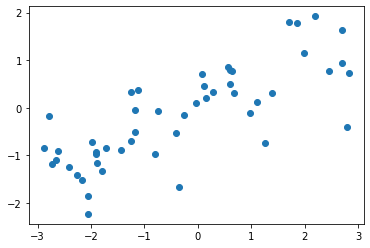

LinearRegression()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def make_wave(n_samples =100):
  rnd = np.random.RandomState(42)
  X = rnd.uniform(-3, 3, size = n_samples)
  y_no_noise = (np.sin(4*X)+X)
  y = (y_no_noise + rnd.normal(size=len(X))) / 2
  return X.reshape(-1, 1,), y

X, y = make_wave(50)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

plt.scatter(X, y)
plt.show()

model = LinearRegression()
model.fit(X_train, y_train)


In [25]:
print(model.coef_)
print(model.intercept_)
print(f'훈련셋 점수 : {model.score(X_train, y_train)}')
print(f'테스트셋 점수 : {model.score(X_test, y_test)}')

[0.45526065]
-0.013840511589946813
훈련셋 점수 : 0.6205656258146893
테스트셋 점수 : 0.40178313967861834


In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())

X_train, X_test, y_train, y_test = train_test_split(cancer.data , cancer.target , random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


0.7291758706114044

In [35]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing =fetch_california_housing()
print(housing.data)
print(housing.feature_names)

df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df.head()

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
model.fit(X_train, y_train)

print(f'학습 데이터 : {model.score(X_train, y_train)}')
print(f'평가 데이터 : {model.score(X_test, y_test)}')

from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing.data, housing.target, cv=10, scoring='neg_mean_squared_error')
print(f' mean : {score.mean()}')
print(f' std : {score.std()}')

r2_score = cross_val_score(model, housing.data, housing.target, cv=10, scoring='r2')
print(f'R^2 score : {r2_score.mean()}')

학습 데이터 : 0.6205656258146893
평가 데이터 : 0.40178313967861834
 mean : -0.5509524296956663
 std : 0.19288582953865124
R^2 score : 0.5110068610523755
